#UNIT 4

# CNN architectures-components of a CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # For 10-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

# Image classification using CNNs

In [ ]:
pip install tensorflow matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


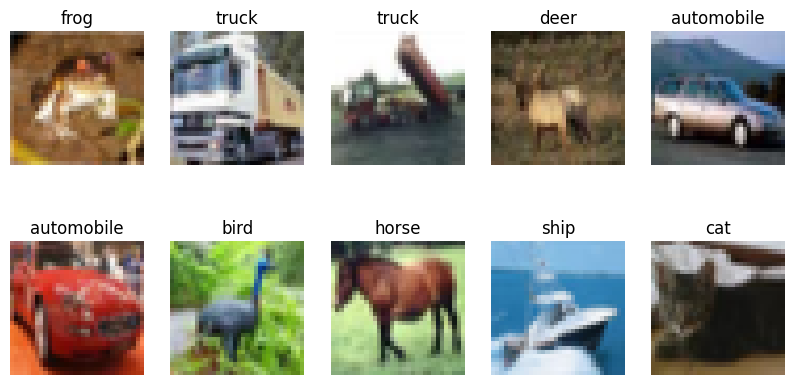

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 79ms/step - accuracy: 0.3047 - loss: 1.8711 - val_accuracy: 0.5621 - val_loss: 1.2242
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.5307 - loss: 1.3044 - val_accuracy: 0.6278 - val_loss: 1.0437
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 76ms/step - accuracy: 0.6079 - loss: 1.1140 - val_accuracy: 0.6776 - val_loss: 0.9395
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 76ms/step - accuracy: 0.6579 - loss: 0.9740 - val_accuracy: 0.6752 - val_loss: 0.9542
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 77ms/step - accuracy: 0.6908 - loss: 0.8927 - val_accuracy: 0.7137 - val_loss: 0.8198
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 78ms/step - accuracy: 0.7157 - loss: 0.8151 - val_accuracy: 0.7109 - val_loss: 0.8320
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 79ms/step - accuracy: 0.7333 - loss: 0.7556 - val_accuracy: 0.7290 - val_loss: 0.7820
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 77ms/step - accuracy: 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7361 - loss: 0.7717
Test Accuracy: 0.7362


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


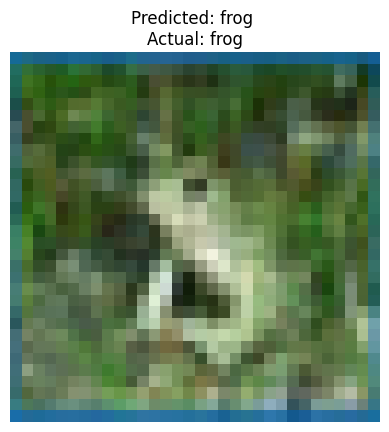

In [ ]:
predictions = model.predict(x_test)

# Show a random image with predicted label
index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index])
plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]} \nActual: {class_names[y_test[index][0]]}")
plt.axis("off")
plt.show()


## genrate image and reduce blur

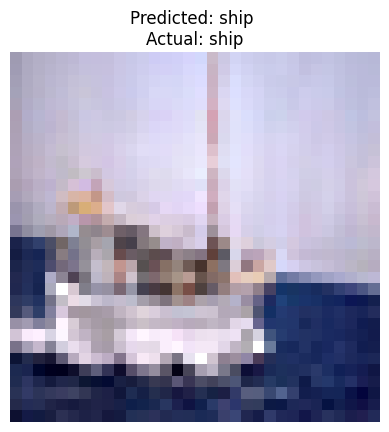

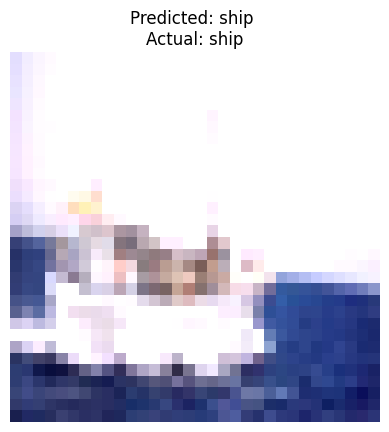

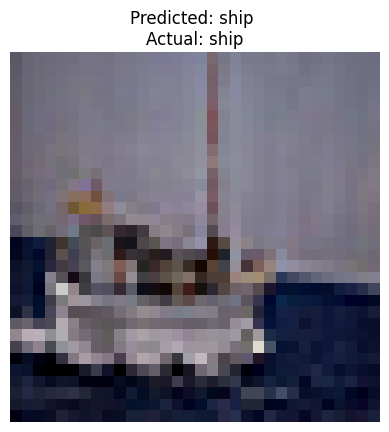

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Select a random index
index = np.random.randint(0, len(x_test))
image = x_test[index]

# Convert image to OpenCV format (uint8, 0-255)
image_cv = (image * 255).astype(np.uint8)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image_cv, (5, 5), 0)

# Sharpen using Unsharp Masking
sharpened = cv2.addWeighted(image_cv, 1.5, blurred, -0.5, 0)

# Show the sharpened image with prediction
plt.imshow(sharpened)
plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]} \nActual: {class_names[y_test[index][0]]}")
plt.axis("off")
plt.show()

sharpened = cv2.addWeighted(image_cv, 1.5, blurred, -0.1, 0)
# Show the sharpened image with prediction
plt.imshow(sharpened)
plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]} \nActual: {class_names[y_test[index][0]]}")
plt.axis("off")
plt.show()
sharpened = cv2.addWeighted(image_cv, 1.5, blurred, -0.9, 0)
# Show the sharpened image with prediction
plt.imshow(sharpened)
plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]} \nActual: {class_names[y_test[index][0]]}")
plt.axis("off")
plt.show()

# Object detection with R-CNN

In [ ]:
pip install torch torchvision numpy opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load pretrained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO dataset class labels (80 classes)
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
    'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'TV', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


KeyboardInterrupt: 

In [ ]:
def detect_objects(image_path):
    # Load and preprocess image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = torch.tensor(image_rgb / 255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

    # Perform detection
    with torch.no_grad():
        predictions = model(image_tensor)

    # Extract detections
    boxes = predictions[0]['boxes'].numpy()
    labels = predictions[0]['labels'].numpy()
    scores = predictions[0]['scores'].numpy()

    # Draw bounding boxes
    for box, label, score in zip(boxes, labels, scores):
        if score > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            text = f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}"
            cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display image with detections
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Example usage
detect_objects("example.jpg")


#  SSD

In [ ]:
pip install torch torchvision numpy opencv-python matplotlib


In [ ]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load pretrained SSD model
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()

# COCO dataset class labels (80 classes)
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
    'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'TV', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [ ]:
def detect_objects(image_path):
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = torch.tensor(image_rgb / 255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

    # Perform detection
    with torch.no_grad():
        predictions = model(image_tensor)

    # Extract detections
    boxes = predictions[0]['boxes'].numpy()
    labels = predictions[0]['labels'].numpy()
    scores = predictions[0]['scores'].numpy()

    # Draw bounding boxes
    for box, label, score in zip(boxes, labels, scores):
        if score > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            text = f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}"
            cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display image with detections
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Example usage
detect_objects("example.jpg")


NameError: name 'cv2' is not defined

# High-level SSD architecture

In [ ]:
pip install torch torchvision numpy opencv-python matplotlib


In [ ]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained SSD model (SSD300 with VGG16 backbone)
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()

# COCO dataset class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
    'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'TV', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 74.7MB/s]


In [ ]:
image_path="/content/drive/MyDrive/faces.jpg"
def detect_objects(image_path, confidence_threshold=0.5):
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert image to tensor
    image_tensor = torch.tensor(image_rgb / 255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

    # Perform detection
    with torch.no_grad():
        predictions = model(image_tensor)

    # Extract detections
    boxes = predictions[0]['boxes'].numpy()
    labels = predictions[0]['labels'].numpy()
    scores = predictions[0]['scores'].numpy()

    # Draw bounding boxes
    for box, label, score in zip(boxes, labels, scores):
        if score > confidence_threshold:  # Filter low-confidence detections
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            text = f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}"
            cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display image with detections
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Example usage
detect_objects(image_path)


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
def detect_objects(image_path, confidence_threshold=0.5):
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert image to tensor
    image_tensor = torch.tensor(image_rgb / 255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

    # Perform detection
    with torch.no_grad():
        predictions = model(image_tensor)

    # Extract detections
    boxes = predictions[0]['boxes'].numpy()
    labels = predictions[0]['labels'].numpy()
    scores = predictions[0]['scores'].numpy()

    # Draw bounding boxes
    for box, label, score in zip(boxes, labels, scores):
        if score > confidence_threshold:  # Filter low-confidence detections
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            text = f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}"
            cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display image with detections
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Example usage
detect_objects("example.jpg")


#Actual class content covered

In [ ]:
# Gradient Descent for f(x) = (x - 5)^2
def f_prime(x):
    return 2 * (x - 5)

# Initialize x
x = 0.0
learning_rate = 0.1
iterations = 25

for i in range(iterations):
    grad = f_prime(x)
    x = x - learning_rate * grad
    print(f"Iteration {i+1}: x = {x:.4f}, f(x) = {(x - 5)**2:.6f}")


Iteration 1: x = 1.0000, f(x) = 16.000000
Iteration 2: x = 1.8000, f(x) = 10.240000
Iteration 3: x = 2.4400, f(x) = 6.553600
Iteration 4: x = 2.9520, f(x) = 4.194304
Iteration 5: x = 3.3616, f(x) = 2.684355
Iteration 6: x = 3.6893, f(x) = 1.717987
Iteration 7: x = 3.9514, f(x) = 1.099512
Iteration 8: x = 4.1611, f(x) = 0.703687
Iteration 9: x = 4.3289, f(x) = 0.450360
Iteration 10: x = 4.4631, f(x) = 0.288230
Iteration 11: x = 4.5705, f(x) = 0.184467
Iteration 12: x = 4.6564, f(x) = 0.118059
Iteration 13: x = 4.7251, f(x) = 0.075558
Iteration 14: x = 4.7801, f(x) = 0.048357
Iteration 15: x = 4.8241, f(x) = 0.030949
Iteration 16: x = 4.8593, f(x) = 0.019807
Iteration 17: x = 4.8874, f(x) = 0.012677
Iteration 18: x = 4.9099, f(x) = 0.008113
Iteration 19: x = 4.9279, f(x) = 0.005192
Iteration 20: x = 4.9424, f(x) = 0.003323
Iteration 21: x = 4.9539, f(x) = 0.002127
Iteration 22: x = 4.9631, f(x) = 0.001361
Iteration 23: x = 4.9705, f(x) = 0.000871
Iteration 24: x = 4.9764, f(x) = 0.000558

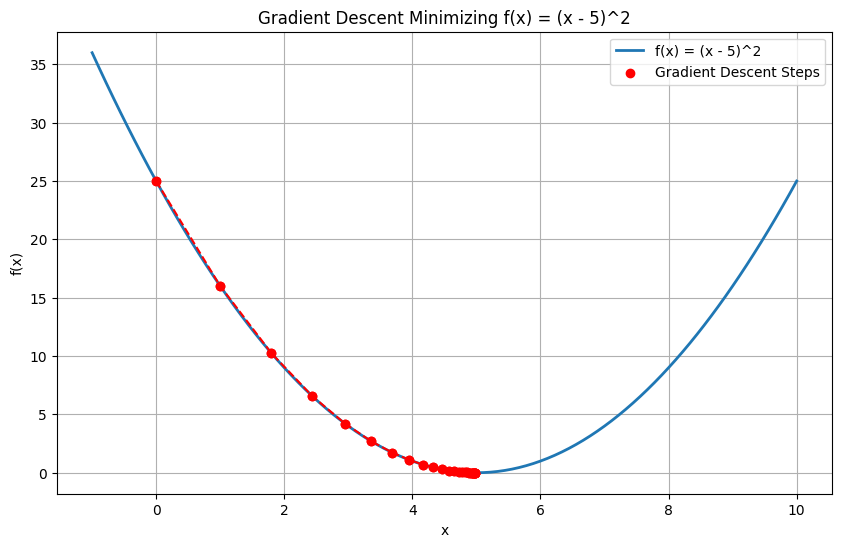

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# True minimum
target = 5

# Loss function
def f(x): return (x - target)**2
def f_prime(x): return 2 * (x - target)

# Gradient Descent
x_vals = [0.0]
learning_rate = 0.1
for _ in range(25):
    grad = f_prime(x_vals[-1])
    x_new = x_vals[-1] - learning_rate * grad
    x_vals.append(x_new)

# Plot the function
x_range = np.linspace(-1, 10, 100)
y_range = f(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label="f(x) = (x - 5)^2", linewidth=2)
plt.scatter(x_vals, [f(x) for x in x_vals], color='red', label='Gradient Descent Steps')
plt.plot(x_vals, [f(x) for x in x_vals], '--o', color='red')
plt.title("Gradient Descent Minimizing f(x) = (x - 5)^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


# Implementing problems


Iter 1: x = 1.0000, loss = 16.000000
Iter 2: x = 2.7000, loss = 5.290000
Iter 3: x = 4.6900, loss = 0.096100
Iter 4: x = 6.5430, loss = 2.380849
Iter 5: x = 7.9021, loss = 8.422184
Iter 6: x = 8.5449, loss = 12.566103
Iter 7: x = 8.4144, loss = 11.658052
Iter 8: x = 7.6141, loss = 6.833405
Iter 9: x = 6.3710, loss = 1.879594
Iter 10: x = 4.9780, loss = 0.000484
Iter 11: x = 3.7287, loss = 1.616162
Iter 12: x = 2.8586, loss = 4.585520
Iter 13: x = 2.5038, loss = 6.230991
Iter 14: x = 2.6837, loss = 5.365189
Iter 15: x = 3.3089, loss = 2.859864
Iter 16: x = 4.2098, loss = 0.624469
Iter 17: x = 5.1786, loss = 0.031900
Iter 18: x = 6.0148, loss = 1.029897
Iter 19: x = 6.5645, loss = 2.447601
Iter 20: x = 6.7463, loss = 3.049435
Iter 21: x = 6.5606, loss = 2.435517
Iter 22: x = 6.0814, loss = 1.169442
Iter 23: x = 5.4338, loss = 0.188217
Iter 24: x = 4.7643, loss = 0.055573
Iter 25: x = 4.2088, loss = 0.626016
Iter 26: x = 3.8671, loss = 1.283452
Iter 27: x = 3.7862, loss = 1.473387
Iter 28

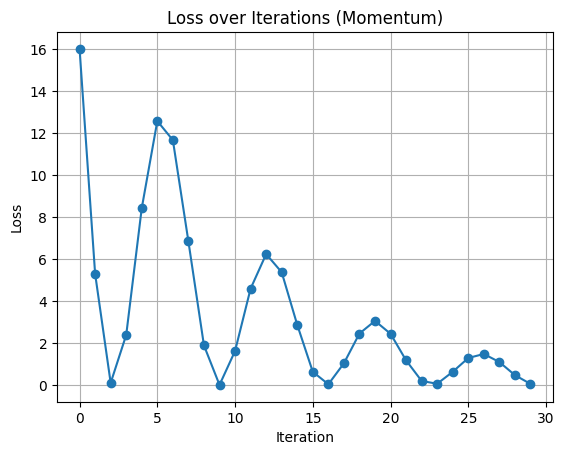

In [ ]:
# momentum

import matplotlib.pyplot as plt

# Function and its derivative
def f(x):
    return (x - 5) ** 2

def grad_f(x):
    return 2 * (x - 5)

# Parameters
x = 0             # initial guess
eta = 0.1         # learning rate
beta = 0.9        # momentum factor
v = 0             # initial velocity
iterations = 30

x_vals, f_vals = [], []

# Gradient Descent with Momentum
for i in range(iterations):
    g = grad_f(x)
    v = beta * v + eta * g
    x = x - v
    loss = f(x)

    x_vals.append(x)
    f_vals.append(loss)
    print(f"Iter {i+1}: x = {x:.4f}, loss = {loss:.6f}")

# Plot loss vs iteration
plt.plot(f_vals, marker='o')
plt.title("Loss over Iterations (Momentum)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


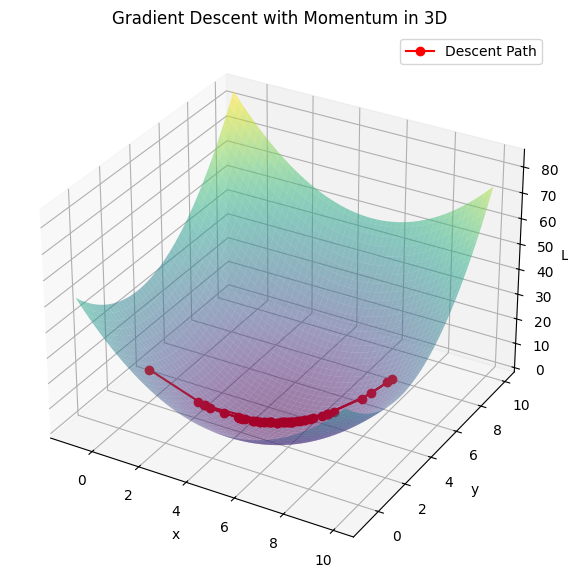

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loss function and gradients
def f(x, y):
    return (x - 5)**2 + (y - 3)**2

def grad_f(x, y):
    return np.array([2*(x - 5), 2*(y - 3)])

# Initialization
x, y = 0.0, 0.0
eta = 0.1
beta = 0.9
v = np.array([0.0, 0.0])

x_vals, y_vals, z_vals = [], [], []

# Gradient Descent with Momentum
for _ in range(50):
    grad = grad_f(x, y)
    v = beta * v + eta * grad
    x -= v[0]
    y -= v[1]
    z = f(x, y)

    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)

# Surface plot
X = np.linspace(-1, 10, 100)
Y = np.linspace(-1, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
# Descent path
ax.plot(x_vals, y_vals, z_vals, color='red', marker='o', label='Descent Path')
ax.set_title("Gradient Descent with Momentum in 3D")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Loss")
ax.legend()

plt.show()


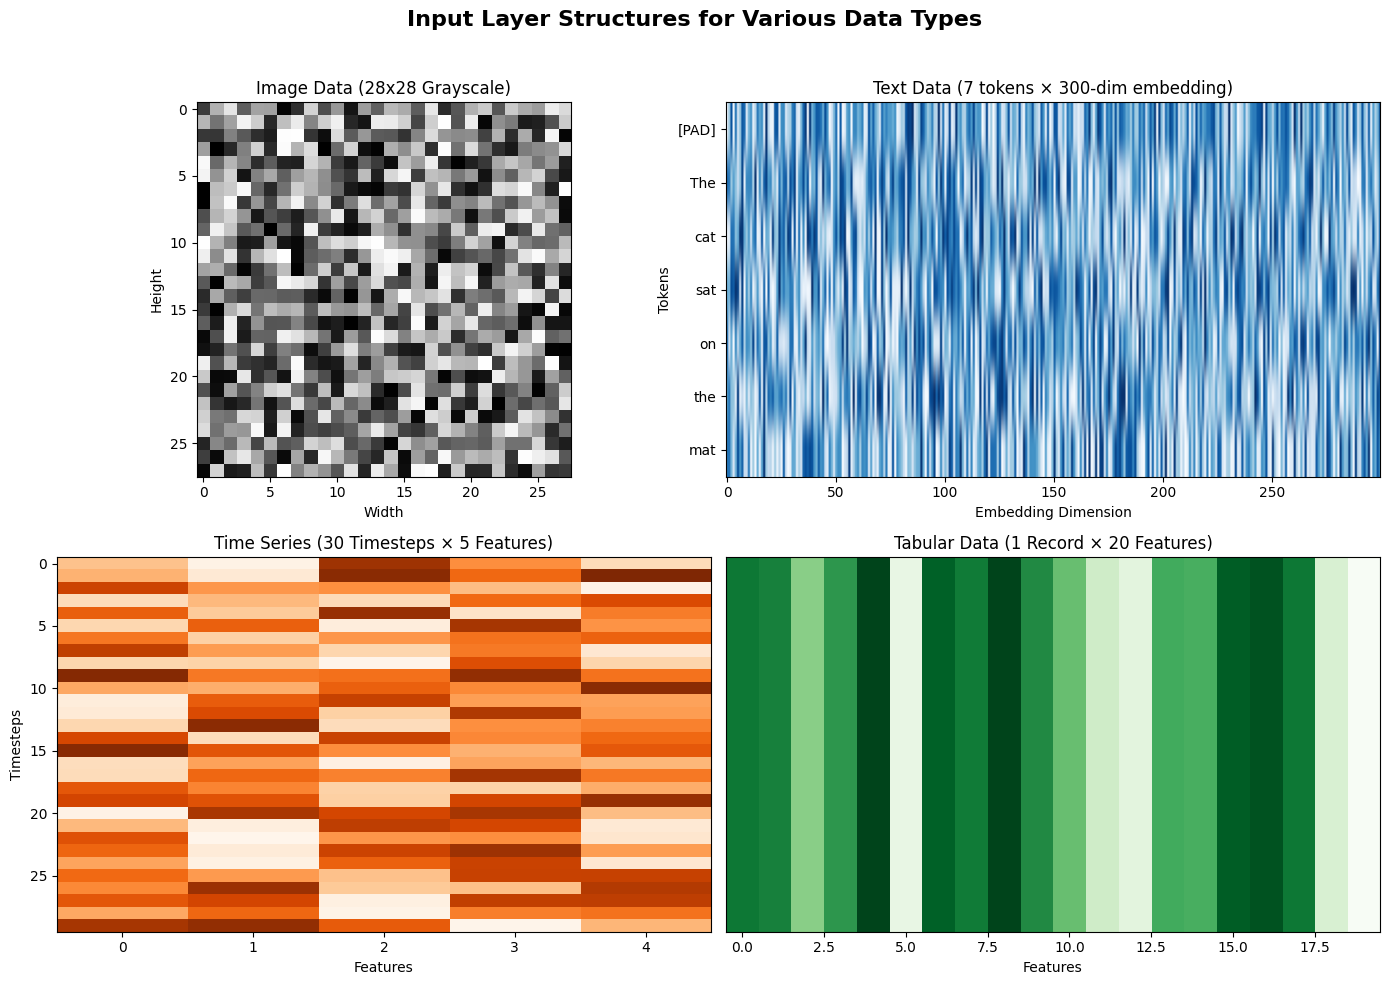

In [ ]:
# Visual comparison of Input Layer structures for different data types
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Input Layer Structures for Various Data Types', fontsize=16, fontweight='bold')

# --- Image Data ---
axes[0, 0].imshow(np.random.rand(28, 28), cmap='gray')
axes[0, 0].set_title('Image Data (28x28 Grayscale)')
axes[0, 0].set_xlabel('Width')
axes[0, 0].set_ylabel('Height')

# --- Text Data ---
text_tokens = ["[PAD]", "The", "cat", "sat", "on", "the", "mat"]
text_data = np.random.rand(len(text_tokens), 300)
axes[0, 1].imshow(text_data, aspect='auto', cmap='Blues')
axes[0, 1].set_title('Text Data (7 tokens × 300-dim embedding)')
axes[0, 1].set_xlabel('Embedding Dimension')
axes[0, 1].set_ylabel('Tokens')
axes[0, 1].set_yticks(range(len(text_tokens)))
axes[0, 1].set_yticklabels(text_tokens)

# --- Time Series Data ---
time_data = np.random.rand(30, 5)
axes[1, 0].imshow(time_data, aspect='auto', cmap='Oranges')
axes[1, 0].set_title('Time Series (30 Timesteps × 5 Features)')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Timesteps')

# --- Tabular Data ---
tabular_data = np.random.rand(1, 20)
axes[1, 1].imshow(tabular_data, aspect='auto', cmap='Greens')
axes[1, 1].set_title('Tabular Data (1 Record × 20 Features)')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# 🖼️ Image Data (28x28 grayscale)
image_input = Input(shape=(28, 28, 1), name='image_input')

# 📜 Text Data (50 tokens × 300-dim embeddings)
text_input = Input(shape=(50, 300), name='text_input')

# 📈 Time Series Data (30 timesteps × 5 features)
time_series_input = Input(shape=(30, 5), name='time_series_input')

# 📊 Tabular Data (20 features)
tabular_input = Input(shape=(20,), name='tabular_input')


In [ ]:
# Example dummy model
from tensorflow.keras.layers import Dense, Flatten
x = Flatten()(image_input)
x = Dense(64, activation='relu')(x)
model = Model(inputs=image_input, outputs=x)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,240 (196.25 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# Dummy 6x6 grayscale image
image = np.array([
    [1, 2, 1, 0, 2, 3],
    [0, 1, 0, 2, 1, 2],
    [1, 2, 2, 1, 0, 1],
    [2, 0, 1, 3, 2, 0],
    [1, 1, 0, 2, 1, 1],
    [0, 2, 3, 0, 2, 1]
])

# 3x3 filter (e.g., edge detector)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Convolution operation
def convolve2d(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    output = np.zeros((h - kh + 1, w - kw + 1))

    for i in range(h - kh + 1):
        for j in range(w - kw + 1):
            region = image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

# ReLU activation
def relu(x):
    return np.maximum(0, x)

# Max pooling 2x2
def max_pooling(image, size=2, stride=2):
    h, w = image.shape
    out_h = h // stride
    out_w = w // stride
    output = np.zeros((out_h, out_w))

    for i in range(0, h, stride):
        for j in range(0, w, stride):
            output[i//stride, j//stride] = np.max(image[i:i+size, j:j+size])
    return output

# Flatten layer
def flatten(x):
    return x.flatten()

# Fully connected layer
def fully_connected(x, weights, bias):
    return np.dot(x, weights) + bias

# Softmax function
def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

# Forward pass
conv_out = convolve2d(image, kernel)
relu_out = relu(conv_out)
pool_out = max_pooling(relu_out)
flat_out = flatten(pool_out)

# Fully connected to 2 outputs
weights = np.random.rand(flat_out.shape[0], 2)
bias = np.random.rand(2)
fc_out = fully_connected(flat_out, weights, bias)
output = softmax(fc_out)

# Final prediction
print("CNN Output (class probabilities):", output)


CNN Output (class probabilities): [0.06575064 0.93424936]


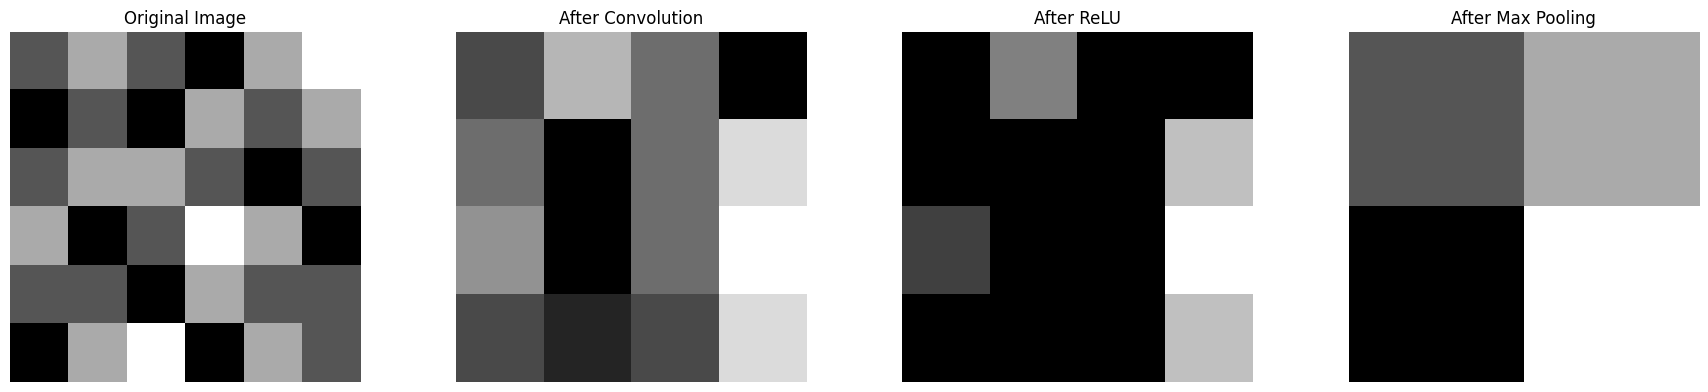

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy 6x6 grayscale image
image = np.array([
    [1, 2, 1, 0, 2, 3],
    [0, 1, 0, 2, 1, 2],
    [1, 2, 2, 1, 0, 1],
    [2, 0, 1, 3, 2, 0],
    [1, 1, 0, 2, 1, 1],
    [0, 2, 3, 0, 2, 1]
], dtype=np.float32)

# 3x3 filter (e.g., edge detector)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)

# Convolution operation
def convolve2d(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    output = np.zeros((h - kh + 1, w - kw + 1))

    for i in range(h - kh + 1):
        for j in range(w - kw + 1):
            region = image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

# ReLU activation
def relu(x):
    return np.maximum(0, x)

# Max pooling 2x2
def max_pooling(image, size=2, stride=2):
    h, w = image.shape
    out_h = h // stride
    out_w = w // stride
    output = np.zeros((out_h, out_w))

    for i in range(0, h, stride):
        for j in range(0, w, stride):
            output[i//stride, j//stride] = np.max(image[i:i+size, j:j+size])
    return output

# CNN forward steps
conv_out = convolve2d(image, kernel)
relu_out = relu(conv_out)
pool_out = max_pooling(relu_out)

# Visualize the steps
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")

axes[1].imshow(conv_out, cmap='gray')
axes[1].set_title("After Convolution")

axes[2].imshow(relu_out, cmap='gray')
axes[2].set_title("After ReLU")

axes[3].imshow(pool_out, cmap='gray')
axes[3].set_title("After Max Pooling")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


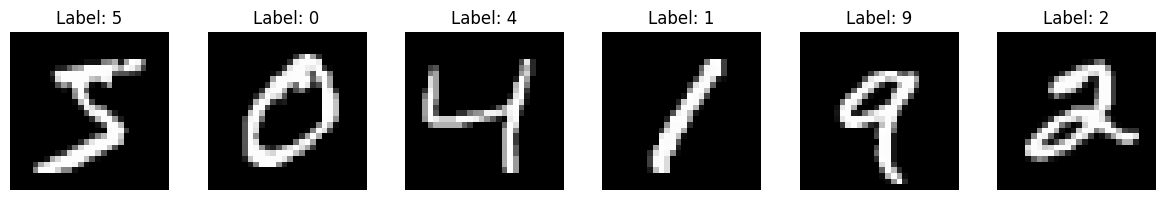

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST from OpenML (only 100 samples for demo)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data[:100], mnist.target[:100].astype(int)

# Normalize and reshape to 28x28
X = X / 255.0
X_images = X.reshape(-1, 28, 28)

# Display 6 sample images
fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    axes[i].imshow(X_images[i], cmap='gray')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()
